In [1]:
import numpy as np
import pandas as pd
import os
import sys
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append(r'/Users/saskiad/aibs/Analysis')

In [3]:
from CreateStimTable import get_sync, get_sync_table

In [4]:
logpath = r'/Volumes/Brain2017/TargetedSFTF/682731703/681698752_373112_20180411_stim.pkl'
syncpath = r'/Volumes/Brain2017/TargetedSFTF/682731703/681698752_373112_20180411_sync.h5'

In [5]:
twop_frames, acquisition_rate = get_sync(syncpath)
sync_dict = get_sync_table(logpath, twop_frames)  
stim_table = sync_dict['0']

Dropped frames: 6 at [  600.28825  1200.26275  1802.23868  2403.21384  3004.18881  3607.16554]
Long frames(>0.1 s): 0 at []
Photodiode events before stimulus start.  Deleted.
Delay: 0.0046
Delay std: 0.0
Loading stimulus log from: /Volumes/Brain2017/TargetedSFTF/682731703/681698752_373112_20180411_stim.pkl
drifting_gratings_SFTF


In [6]:
stim_table = sync_dict['0']

In [7]:
stim_table.head()

,Start,End,sweep_number,TF,SF,Ori,Contrast
0,435.0,495.0,91,8.0,0.08,270.0,0.8
1,526.0,585.0,38,1.0,0.32,180.0,0.8
2,616.0,676.0,30,1.0,0.08,180.0,0.8
3,707.0,766.0,45,2.0,0.04,90.0,0.8
4,797.0,857.0,16,0.5,0.32,0.0,0.8


In [8]:
stim_table.to_csv(r'/Volumes/Brain2017/TargetedSFTF/682731703/stim_table.csv')

In [16]:
np.sort(stim_table.TF.dropna().unique())

array([ 0.5,  1. ,  2. ,  4. ,  8. ])

In [19]:
np.sort(stim_table.SF.unique())

array([ 0.02,  0.04,  0.08,  0.16,  0.32,   nan])

In [18]:
np.sort(stim_table.Ori.unique())

array([   0.,   90.,  180.,  270.,   nan])

## Make stim tables for all SFxTF experiments

In [20]:
targeted_expts = pd.read_csv(r'/Volumes/programs/braintv/workgroups/nc-ophys/VisualCoding/targeted_manifest.csv')

In [21]:
sftf.ophys_session_id

array([nan, 'VisCodingTargetedContrast',
       'VisCodingTargetedRunningDecoding', 'VisCodingTargetedTFxSF',
       'VisCodingTargetedMovieClips', 'targeted_exp_natural_scenes'], dtype=object)

In [22]:
sftf = targeted_expts[targeted_expts.stimulus_name=='VisCodingTargetedTFxSF']

In [29]:
for index, row in sftf.iterrows():
    exp_path_head = row.storage_directory
    #format path for mac
    temp = exp_path_head.split('/')
    temp[1] = 'Volumes'
    exp_path_head = '/'.join(temp)

    exp_path_files = os.listdir(exp_path_head)
    exp_folder_list = [i for i in exp_path_files if 'ophys_experiment' in i]
    if len(exp_folder_list) > 1:
        raise Exception('Multiple experiment folders in '+exp_path_head)
    else:
        exp_folder = exp_folder_list[0]
    for f in os.listdir(exp_path_head):
        if f.endswith('.pkl'):
            logpath = os.path.join(exp_path_head, f)
            print "Stimulus log:", f
        if f.endswith('sync.h5'):
            syncpath = os.path.join(exp_path_head, f)
            print "Sync file:", f
    twop_frames, acquisition_rate = get_sync(syncpath)
    sync_dict = get_sync_table(logpath, twop_frames)  
    stim_table = sync_dict['0']
    savepath = '/Volumes/programs/braintv/workgroups/nc-ophys/VisualCoding/stimulus_tables/'+str(row.ophys_session_id)+'_stim_table.csv'
    stim_table.to_csv(savepath)
    print "saved to ", savepath

Stimulus log: 693163510_377629_20180502_stim.pkl
Sync file: 693163510_377629_20180502_sync.h5
Dropped frames: 0 at []
Long frames(>0.1 s): 0 at []
Photodiode events before stimulus start.  Deleted.
Photodiode error detected. Number of frames: 4
Photodiode error detected. Number of frames: 2
Delay: 0.0231
Delay std: 0.0001
Loading stimulus log from: /Volumes/programs/braintv/production/neuralcoding/prod49/specimen_664744816/ophys_session_693163510/693163510_377629_20180502_stim.pkl
drifting_gratings_SFTF
saved to  /Volumes/programs/braintv/workgroups/nc-ophys/VisualCoding/stimulus_tables/693163510_stim_table.csv
Stimulus log: 687293842_377321_20180420_stim.pkl
Sync file: 687293842_377321_20180420_sync.h5
Dropped frames: 0 at []
Long frames(>0.1 s): 0 at []
Photodiode events before stimulus start.  Deleted.
Photodiode error detected. Number of frames: 7
Photodiode error detected. Number of frames: 5
Photodiode error detected. Number of frames: 4
Photodiode error detected. Number of frame

Loading stimulus log from: /Volumes/programs/braintv/production/neuralcoding/prod49/specimen_666788991/ophys_session_693424346/693424346_377129_20180503_stim.pkl
drifting_gratings_SFTF
saved to  /Volumes/programs/braintv/workgroups/nc-ophys/VisualCoding/stimulus_tables/693424346_stim_table.csv
Stimulus log: 692413859_377129_20180501_stim.pkl
Sync file: 692413859_377129_20180501_sync.h5
Dropped frames: 0 at []
Long frames(>0.1 s): 0 at []
Photodiode events before stimulus start.  Deleted.
Photodiode error detected. Number of frames: 8
Photodiode error detected. Number of frames: 6
Photodiode error detected. Number of frames: 4
Photodiode error detected. Number of frames: 2
Delay: 0.0231
Delay std: 0.0001
Loading stimulus log from: /Volumes/programs/braintv/production/neuralcoding/prod49/specimen_666788991/ophys_session_692413859/692413859_377129_20180501_stim.pkl
drifting_gratings_SFTF
saved to  /Volumes/programs/braintv/workgroups/nc-ophys/VisualCoding/stimulus_tables/692413859_stim_ta

Loading stimulus log from: /Volumes/programs/braintv/production/neuralcoding/prod48/specimen_664605504/ophys_session_696130311/696130311_377321_20180509_stim.pkl
drifting_gratings_SFTF
saved to  /Volumes/programs/braintv/workgroups/nc-ophys/VisualCoding/stimulus_tables/696130311_stim_table.csv
Sync file: 695746063_377129_20180509_sync.h5
Stimulus log: 695746063_377129_20180509_stim.pkl
Dropped frames: 0 at []
Long frames(>0.1 s): 0 at []
Photodiode events before stimulus start.  Deleted.
Photodiode error detected. Number of frames: 4
Photodiode error detected. Number of frames: 2
Delay: 0.0232
Delay std: 0.0001
Loading stimulus log from: /Volumes/programs/braintv/production/neuralcoding/prod49/specimen_666788991/ophys_session_695746063/695746063_377129_20180509_stim.pkl
drifting_gratings_SFTF
saved to  /Volumes/programs/braintv/workgroups/nc-ophys/VisualCoding/stimulus_tables/695746063_stim_table.csv
Sync file: 697608599_382481_20180514_sync.h5
Stimulus log: 697608599_382481_20180514_s

In [27]:
datapath

'/Volumes/programs/braintv/production/neuralcoding/prod49/specimen_664744816/ophys_session_693163510/ophys_experiment_693285206'

## Analyze experiment

In [369]:
session_id = 692308988#681698752#

In [31]:
basepath = r'/Users/saskiad/Documents/Data/CAM/Targeted Experiments'

In [370]:
eventpath = os.path.join(basepath, 'events')
for f in os.listdir(eventpath):
    if f.startswith(str(session_id)):
        events = np.load(os.path.join(eventpath, f))['ev']

In [371]:
events.shape

(374, 110392)

In [372]:
numbercells = events.shape[0]

In [373]:
stimpath = os.path.join(basepath, 'stimulus_tables')
for f in os.listdir(stimpath):
    if f.startswith(str(session_id)):
        stim_table = pd.read_csv(os.path.join(stimpath, f))

In [374]:
stim_table.head()

,Unnamed: 0,Start,End,sweep_number,TF,SF,Ori,Contrast
0,0,440.0,500.0,98,8.0,0.32,180.0,0.8
1,1,530.0,590.0,53,2.0,0.16,90.0,0.8
2,2,621.0,681.0,74,4.0,0.16,180.0,0.8
3,3,711.0,771.0,40,2.0,0.02,0.0,0.8
4,4,802.0,862.0,13,0.5,0.16,90.0,0.8


In [44]:
def do_sweep_mean(x):
    return x[30:].mean()

In [375]:
sweep_events = pd.DataFrame(index=stim_table.index.values, columns=np.array(range(numbercells)).astype(str))
for ind,row_stim in stim_table.iterrows():
    for nc in range(numbercells):
        sweep_events[str(nc)][ind] = events[nc, int(row_stim.Start)-30:int(row_stim.Start)+60]
mean_sweep_events = sweep_events.applymap(do_sweep_mean)

In [376]:
shuffled_responses = np.empty((numbercells, 10000, 60))
idx = np.random.choice(range(int(stim_table.Start.min()), int(stim_table.End.max())), 10000)
for i in range(60):
    shuffled_responses[:,:,i] = events[:,idx+i]
shuffled_mean = shuffled_responses.mean(axis=2)
sweep_p_vals = pd.DataFrame(index = stim_table.index.values, columns=np.array(range(numbercells)).astype(str))
for nc in range(numbercells):
    subset = mean_sweep_events[str(nc)].values
    null_dist_mat = np.tile(shuffled_mean[nc,:], reps=(len(subset),1))
    actual_is_less = subset.reshape(len(subset),1) <= null_dist_mat
    p_values = np.mean(actual_is_less, axis=1)
    sweep_p_vals[str(nc)] = p_values

In [224]:
# import scipy.stats as st

In [276]:
# def do_pval(x):
#     r,p = st.ks_2samp(x[:30],x[30:])
#     return p

# sweep_p_vals = sweep_events.applymap(do_pval)

In [377]:
orivals = np.sort(stim_table.Ori.dropna().unique())
sfvals = np.sort(stim_table.SF.dropna().unique())
tfvals = np.sort(stim_table.TF.dropna().unique())
contrastvals = np.sort(stim_table.Contrast.dropna().unique())

In [378]:
response_events = np.empty((len(orivals)+1,len(sfvals), len(tfvals),len(contrastvals),numbercells,3))

In [379]:
response_events[:] = np.NaN
blank = mean_sweep_events[np.isnan(stim_table.Ori)]
response_events[0,0,0,0,:,0] = blank.mean(axis=0)
response_events[0,0,0,0,:,1] = blank.std(axis=0)/np.sqrt(len(blank))

In [380]:
for oi, ori in enumerate(orivals):
    oi+=1
    for ti, tf in enumerate(tfvals):
        for si, sf in enumerate(sfvals):
            for ci, con in enumerate(contrastvals):
                subset = mean_sweep_events[(stim_table.Ori==ori)&(stim_table.TF==tf)&(stim_table.SF==sf)&(stim_table.Contrast==con)]
                subset_pval = sweep_p_vals[(stim_table.Ori==ori)&(stim_table.TF==tf)&(stim_table.SF==sf)&(stim_table.Contrast==con)]
                response_events[oi,si,ti,ci,:,0] = subset.mean(axis=0)
                response_events[oi,si,ti,ci,:,1] = subset.std(axis=0)/np.sqrt(len(subset))
                response_events[oi,si,ti,ci,:,2] = subset_pval[subset_pval<0.05].count()

In [381]:
save_path = r'/Users/saskiad/Documents/Data/CAM/Targeted Experiments/sftf_analysis/'
save_file = os.path.join(save_path, str(session_id)+"_sftf_analysis.h5")
print "Saving data to: ", save_file
store = pd.HDFStore(save_file)
store['sweep_events'] = sweep_events
store['mean_sweep_events'] = mean_sweep_events
store['sweep_p_values'] = sweep_p_vals
store.close()
f = h5py.File(save_file, 'r+')
dset = f.create_dataset('response_events', data=response_events)
f.close()

Saving data to:  /Users/saskiad/Documents/Data/CAM/Targeted Experiments/sftf_analysis/692308988_sftf_analysis.h5


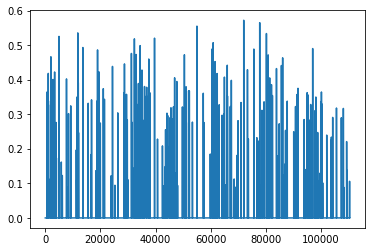

In [282]:
plt.plot(events[25,:])

In [57]:
tfvals

array([ 0.5,  1. ,  2. ,  4. ,  8. ])

In [ ]:
(response[pref_ori, pref_tf, i, 0]-response[null_ori, pref_tf, i, 0])/(response[pref_ori, pref_tf, i, 1]+response[null_ori, pref_tf, i, 1])

In [173]:
for nc in range(numbercells):
    peak = np.where(response_events[1:,:,:,0,nc,0]==response_events[1:,:,:,0,nc,0].max())
    peak_ori = peak[0][0]
    peak_sf = peak[1][0]
    peak_tf = peak[2][0]
    null_ori_ind = np.mod(peak_ori+2,4)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    vmax = response_events[1:,:,:,0,nc,0].max()
    plt.imshow(response_events[peak_ori+1,:,:,0,nc,0], origin='lower', vmax=vmax)
    plt.title("Pref Ori = " + str(orivals[peak_ori]))
    plt.xticks(range(5), tfvals)
    plt.yticks(range(5), sfvals)
    plt.xlabel("TF")
    plt.ylabel("SF")
    plt.subplot(222)
    plt.imshow(response_events[null_ori_ind+1,:,:,0,nc,0], origin='lower',vmax=vmax)
    plt.title("Null Ori = " +str(orivals[null_ori_ind]))
    plt.xlabel("TF")
    plt.ylabel("SF")
    plt.xticks(range(5), tfvals)
    plt.yticks(range(5), sfvals)
    dsi_sftf = (response_events[peak_ori+1,:,:,0,nc,0] - response_events[null_ori_ind+1,:,:,0,nc,0]) / (response_events[peak_ori+1,:,:,0,nc,0] + response_events[null_ori_ind+1,:,:,0,nc,0]) 
    reliability = np.abs((response_events[peak_ori+1,:,:,0,nc,0] - response_events[null_ori_ind+1,:,:,0,nc,0])) / (response_events[peak_ori+1,:,:,0,nc,1] + response_events[null_ori_ind+1,:,:,0,nc,1])
#     reliability = np.where(reliability>1, reliability, np.NaN)
    plt.subplot(223)
    plt.imshow(dsi_sftf, vmin=-1, vmax=1, cmap='RdBu', origin='lower')
    plt.title("DSI")
    plt.xlabel("TF")
    plt.ylabel("SF")
    plt.xticks(range(5), tfvals)
    plt.yticks(range(5), sfvals)
    plt.colorbar()
    plt.subplot(224)
    plt.imshow(reliability, origin='lower', vmin=0, vmax=2, cmap='RdBu')
    plt.title("Reliability")
    plt.xlabel("TF")
    plt.ylabel("SF")
    plt.xticks(range(5), tfvals)
    plt.yticks(range(5), sfvals)
    plt.colorbar()
    plt.savefig(os.path.join(r'/Users/saskiad/Documents/Data/CAM/Targeted Experiments/sftf_plots',str(session_id), str(nc)+'.png'))
    plt.close()

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in divide


In [382]:
dgtf = pd.DataFrame(columns=('cell_index','pref_dir','null_dir','pref_tf','pref_sf','pref_null_tf','pref_null_sf',
                             'pref_response','null_response','DSI_pref_sftf','DSI_null_sftf','DSI_tuning','sftf_tuning_pref',
                             'sftf_tuning_null', 'sftf_sem_pref','sftf_sem_null','num_trials_pref','num_trials_null', 
                             'reliability_pref','reliability_null'), index=range(numbercells))

for i in range(numbercells):
    dgtf.cell_index.loc[i] = i
    peak = np.where(response_events[1:,:,:,0,i,0]==response_events[1:,:,:,0,i,0].max())
    pref_ori = peak[0][0]
    pref_sf = peak[1][0]
    pref_tf = peak[2][0]
    null_ori_ind = np.mod(pref_ori+2,4)
    null = np.where(response_events[null_ori_ind+1,:,:,0,i,0]==response_events[null_ori_ind+1,:,:,0,i,0].max())
    null_sf = null[0][0]
    null_tf = null[1][0]
    
    dgtf.pref_dir.loc[i] = orivals[pref_ori]
    dgtf.null_dir.loc[i] = orivals[null_ori_ind]
    dgtf.pref_tf.loc[i] = tfvals[pref_tf]
    dgtf.pref_sf.loc[i] = sfvals[pref_sf]
    dgtf.pref_null_tf.loc[i] = tfvals[null_tf]
    dgtf.pref_null_sf.loc[i] = sfvals[null_sf]
    dgtf.pref_response.loc[i] = response_events[pref_ori+1, pref_sf, pref_tf, 0, i, 0]
    dgtf.null_response.loc[i] = response_events[null_ori_ind+1, null_sf, null_tf, 0, i, 0]
    dgtf.sftf_tuning_pref.loc[i] = response_events[pref_ori+1,:,:,0,i,0]
    dgtf.sftf_tuning_null.loc[i] = response_events[null_ori_ind+1,:,:,0,i,0]
    dgtf.sftf_sem_pref.loc[i] = response_events[pref_ori+1,:,:,0,i,1]
    dgtf.sftf_sem_null.loc[i] = response_events[pref_ori+1,:,:,0,i,1]
    dsi_sftf = (response_events[peak_ori+1,:,:,0,i,0] - response_events[null_ori_ind+1,:,:,0,i,0]) / (response_events[peak_ori+1,:,:,0,i,0] + response_events[null_ori_ind+1,:,:,0,i,0]) 
    reliability = np.abs((response_events[peak_ori+1,:,:,0,i,0] - response_events[null_ori_ind+1,:,:,0,i,0])) / (response_events[peak_ori+1,:,:,0,i,1] + response_events[null_ori_ind+1,:,:,0,i,1])
    dgtf.DSI_pref_sftf.loc[i] = dsi_sftf[pref_sf, pref_tf]
    dgtf.DSI_null_sftf.loc[i] = dsi_sftf[null_sf, null_tf]
    dgtf.num_trials_pref.loc[i] = response_events[pref_ori+1,pref_sf,pref_tf,0, i, 2]
    dgtf.num_trials_null.loc[i] = response_events[null_ori_ind+1, null_sf, null_tf, 0, i, 2]
    dgtf.reliability_pref.loc[i] = reliability[pref_sf, pref_tf]
    dgtf.reliability_null.loc[i] = reliability[null_sf, null_tf]
    dgtf.DSI_tuning.loc[i] = dsi_sftf
#     dgtf.DSI_pref_tf.loc[i] = (response[pref_ori,pref_tf,i,0] - response[null_ori,pref_tf,i,0])/(response[pref_ori,pref_tf,i,0] + response[null_ori,pref_tf,i,0])
#     dgtf.DSI_null_tf.loc[i] = (response[pref_ori,null_tf+1,i,0] - response[null_ori,null_tf+1,i,0])/(response[pref_ori,null_tf+1,i,0] + response[null_ori,null_tf+1,i,0])

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in divide
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in divide


In [383]:
dgtf['DSI_ratio'] = dgtf.DSI_null_sftf/dgtf.DSI_pref_sftf

In [384]:
dgtf.head()

,cell_index,pref_dir,null_dir,pref_tf,pref_sf,pref_null_tf,pref_null_sf,pref_response,null_response,DSI_pref_sftf,...,DSI_tuning,sftf_tuning_pref,sftf_tuning_null,sftf_sem_pref,sftf_sem_null,num_trials_pref,num_trials_null,reliability_pref,reliability_null,DSI_ratio
0,0,270,90,0.5,0.16,0.5,0.16,0.00533447,0.0037561,-1,...,"[[-0.406765339376, 0.474935305714, 1.0, nan, 1...","[[0.000312102868676, 0.000255976410639, 0.0, 0...","[[0.000775750151986, 7.89525575572e-05, 0.0, 0...","[[0.00016524412316, 0.000133861690494, 0.0, 0....","[[0.00016524412316, 0.000133861690494, 0.0, 0....",5,6,1.99413,1.99413,1
1,1,180,0,2,0.04,8,0.04,0.0441576,0.00460845,0,...,"[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0....","[[0.00485430191518, 0.00381624952242, 0.002241...","[[0.000298298460322, 0.000624221030153, 0.0002...","[[0.00146846051831, 0.0012789815992, 0.0008486...","[[0.00146846051831, 0.0012789815992, 0.0008486...",10,1,0,0,NaN
2,2,90,270,8,0.32,4,0.32,0.00514544,0.00301726,-0.271913,...,"[[0.814179256219, 0.760657195184, 0.2722598084...","[[0.000279336867183, 0.0, 9.10371699159e-05, 8...","[[7.57784748385e-05, 9.78514536615e-05, 0.0002...","[[0.000149077060403, 0.0, 9.10371699159e-05, 8...","[[0.000149077060403, 0.0, 9.10371699159e-05, 8...",1,3,0.388826,1.48416,3.47954
3,3,0,180,8,0.02,0.5,0.02,0.00995485,0.00345618,0.733795,...,"[[-0.746849487195, 0.0275570114157, 0.84580025...","[[0.000500863308226, 0.000896753369894, 0.0012...","[[0.00345617634124, 0.000848655127993, 0.00010...","[[0.000186967514661, 0.000243710343175, 0.0006...","[[0.000186967514661, 0.000243710343175, 0.0006...",8,7,1.72206,2.06557,-1.01779
4,4,270,90,0.5,0.08,0.5,0.08,0.0120729,0.00713968,-0.904347,...,"[[0.198217129433, 0.474815650326, 1.0, nan, na...","[[0.000105771264174, 0.0, 8.33668677938e-05, 0...","[[0.000237253744352, 0.000236181107781, 0.0, 0...","[[0.000105771264174, 0.0, 8.33668677938e-05, 0...","[[0.000105771264174, 0.0, 8.33668677938e-05, 0...",8,6,2.03794,2.03794,1


In [385]:
dgtf.to_csv(r'/Users/saskiad/Documents/Data/CAM/Targeted Experiments/sftf_analysis/'+str(session_id)+'_dgtf.csv')

In [356]:
subset = dgtf[(dgtf.DSI_ratio<0)&(dgtf.reliability_pref>1)&(dgtf.reliability_null>1)&(dgtf.DSI_pref_sftf>0.4)]

In [386]:
subset = dgtf[(dgtf.num_trials_pref>2)&(dgtf.num_trials_null>2)&(dgtf.DSI_ratio<0)&(dgtf.reliability_pref>1)&(dgtf.reliability_null>1)&(dgtf.DSI_pref_sftf>0.4)]

In [396]:
print len(subset)
print len(dgtf)
print len(dgtf[(dgtf.DSI_pref_sftf>0.4)&(dgtf.num_trials_pref>2)])

16
374
88


In [289]:
6/19.

0.3157894736842105

In [397]:
16/88.

0.18181818181818182

In [389]:
subset.head()

,cell_index,pref_dir,null_dir,pref_tf,pref_sf,pref_null_tf,pref_null_sf,pref_response,null_response,DSI_pref_sftf,...,DSI_tuning,sftf_tuning_pref,sftf_tuning_null,sftf_sem_pref,sftf_sem_null,num_trials_pref,num_trials_null,reliability_pref,reliability_null,DSI_ratio
3,3,0,180,8,0.02,0.5,0.02,0.00995485,0.00345618,0.733795,...,"[[-0.746849487195, 0.0275570114157, 0.84580025...","[[0.000500863308226, 0.000896753369894, 0.0012...","[[0.00345617634124, 0.000848655127993, 0.00010...","[[0.000186967514661, 0.000243710343175, 0.0006...","[[0.000186967514661, 0.000243710343175, 0.0006...",8,7,1.72206,2.06557,-1.01779
25,25,0,180,0.5,0.04,0.5,0.02,0.00418239,0.0023003,0.661106,...,"[[-0.412677020141, -0.485594986259, -0.2905851...","[[0.00095635355146, 0.00034517709215, 0.000403...","[[0.00230029937804, 0.000996866950692, 0.00073...","[[0.000311262154463, 0.000188031084097, 0.0001...","[[0.000311262154463, 0.000188031084097, 0.0001...",6,8,1.43789,1.52862,-0.624223
45,45,0,180,0.5,0.04,0.5,0.02,0.0030573,0.00252427,0.681614,...,"[[-0.408281193703, -0.084144811666, -0.5508697...","[[0.00106062337695, 0.00102579650454, 0.000315...","[[0.00252426649191, 0.00121428799268, 0.001090...","[[0.000543975084346, 0.0006056172248, 0.000167...","[[0.000543975084346, 0.0006056172248, 0.000167...",7,5,2.01738,1.13314,-0.598992
54,54,0,180,1,0.02,4,0.02,0.0145704,0.00391717,0.932853,...,"[[0.909109750978, 0.932853451472, 0.8323030602...","[[0.00866741056904, 0.0145703761438, 0.0069728...","[[0.000412644220474, 0.000506168984547, 0.0006...","[[0.00440404146164, 0.00506359653814, 0.003072...","[[0.00440404146164, 0.00506359653814, 0.003072...",11,3,2.5251,1.39266,-0.781948
55,55,0,180,8,0.02,8,0.04,0.0192465,0.00748789,0.562933,...,"[[0.076340040888, 0.940431449578, 0.8130516738...","[[0.000856413952631, 0.00435558633703, 0.00242...","[[0.000734930641266, 0.000133710451039, 0.0002...","[[0.000433504155711, 0.00158712719161, 0.00220...","[[0.000433504155711, 0.00158712719161, 0.00220...",7,3,1.69886,1.15544,-1.04885


In [390]:
test = pd.DataFrame(columns=('cell_index','tf','sf','sftf'), index=range(len(subset)))
test['tf'] = False
test['sf'] = False
test['sftf'] = False

for i in range(len(subset)):
    test.cell_index.iloc[i] = subset.cell_index.iloc[i]
    if subset.pref_tf.iloc[i]!=subset.pref_null_tf.iloc[i]:
        if subset.pref_sf.iloc[i]!=subset.pref_null_sf.iloc[i]:
            test.sftf.iloc[i] = True
        else:
            test.tf.iloc[i] = True
    else:
        test.sf.iloc[i] = True
                

In [391]:
print "TF ", len(test[test.tf])/float(len(test))
print "SF ", len(test[test.sf])/float(len(test))
print "SFTF ", len(test[test.sftf])/float(len(test))

TF  0.1875
SF  0.375
SFTF  0.4375


In [394]:
print "TF ", len(test[test.tf])/float(len(dgtf[(dgtf.DSI_pref_sftf>0.4)&(dgtf.num_trials_pref>2)]))
print "SF ", len(test[test.sf])/float(len(dgtf[(dgtf.DSI_pref_sftf>0.4)&(dgtf.num_trials_pref>2)]))
print "SFTF ", len(test[test.sftf])/float(len(dgtf[(dgtf.DSI_pref_sftf>0.4)&(dgtf.num_trials_pref>2)]))

TF  0.0340909090909
SF  0.0681818181818
SFTF  0.0795454545455


In [395]:
3.4+6.8+7.95

18.15

Text(0,0.5,u'Percent of DS cells')

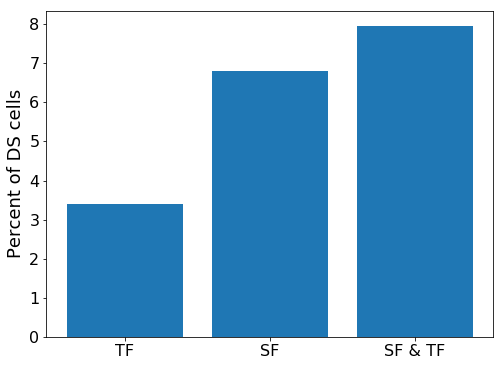

In [398]:
plt.figure(figsize=(8,6))
plt.bar(range(3), [3.4, 6.8, 7.95])
plt.xticks(range(3), ["TF", "SF", "SF & TF"])
plt.tick_params(labelsize=16)
plt.ylabel("Percent of DS cells", fontsize=18)
# plt.ylim(0,20)
# plt.yticks(range(0,21,5))

In [247]:
len(test[test.tf])+len(test[test.sftf])

22

In [248]:
0.16*0.33

0.05280000000000001

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


([<matplotlib.axis.YTick at 0x133870190>,
 <a list of 5 Text yticklabel objects>)

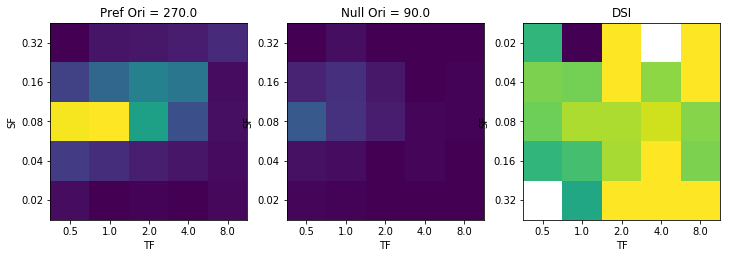

In [150]:
plt.figure(figsize=(10,10))
plt.subplot(131)
vmax = response_events[1:,:,:,0,nc,0].max()
plt.imshow(response_events[peak_ori+1,:,:,0,nc,0], origin='lower', vmax=vmax)
plt.title("Pref Ori = " + str(orivals[peak_ori]))
plt.xticks(range(5), tfvals)
plt.yticks(range(5), sfvals)
plt.xlabel("TF")
plt.ylabel("SF")
plt.subplot(132)
plt.imshow(response_events[null_ori_ind+1,:,:,0,nc,0], origin='lower',vmax=vmax)
plt.title("Null Ori = " +str(orivals[null_ori_ind]))
plt.xlabel("TF")
plt.ylabel("SF")
plt.xticks(range(5), tfvals)
plt.yticks(range(5), sfvals)
dsi_sftf = (response_events[peak_ori+1,:,:,0,nc,0] - response_events[null_ori_ind+1,:,:,0,nc,0]) / (response_events[peak_ori+1,:,:,0,nc,0] + response_events[null_ori_ind+1,:,:,0,nc,0]) 
plt.subplot(133)
plt.imshow(dsi_sftf, vmin=-1, vmax=1, origin='lower')
plt.title("DSI")
plt.xlabel("TF")
plt.ylabel("SF")
plt.xticks(range(5), tfvals)
plt.yticks(range(5), sfvals)

In [140]:
peak = np.where(response_events[1:,:,:,0,nc,0]==response_events[1:,:,:,0,nc,0].max())
print peak

peak_ori = peak[0][0]
peak_sf = peak[1][0]
peak_tf = peak[2][0]

null_ori_ind = np.mod(peak_ori+2,4)
print null_ori_ind

(array([0]), array([0]), array([0]))
2


In [90]:
pref_ori = orivals[peak_ori]
pref_sf = sfvals[peak_sf]
pref_tf = tfvals[peak_tf]
print pref_ori, pref_sf, pref_tf

null_ori = np.mod(pref_ori+180,180)
print null_ori

180.0 0.16 1.0


In [144]:
nc

79

In [145]:
dsi_sftf = (response_events[peak_ori+1,:,:,0,nc,0] - response_events[null_ori_ind+1,:,:,0,nc,0]) / (response_events[peak_ori+1,:,:,0,nc,0] + response_events[null_ori_ind+1,:,:,0,nc,0]) 

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


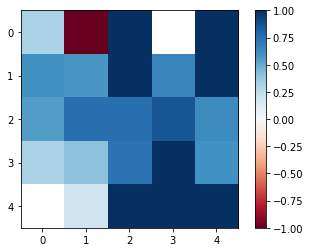

In [152]:
plt.imshow(dsi_sftf, vmin=-1, vmax=1, cmap='RdBu')
plt.colorbar()

In [294]:
stim_table.Ori.unique()

array([ 270.,  180.,   90.,    0.,   nan])

In [296]:
len(stim_table[np.isnan(stim_table.Ori)])

12

In [297]:
len(stim_table[(stim_table.Ori==0)&(stim_table.TF==1)&(stim_table.SF==0.04)])

12

In [301]:
stim_table.Start.min()

435.0

In [335]:
shuffled_responses = np.empty((numbercells, 10000, 60))
idx = np.random.choice(range(int(stim_table.Start.min()), int(stim_table.End.max())), 10000)
for i in range(60):
    shuffled_responses[:,:,i] = events[:,idx+i]
shuffled_mean = shuffled_responses.mean(axis=2)
sweep_p_vals = pd.DataFrame(index = stim_table.index.values, columns=np.array(range(numbercells)).astype(str))
for nc in range(numbercells):
    subset = mean_sweep_events[str(nc)].values
    null_dist_mat = np.tile(shuffled_mean[nc,:], reps=(len(subset),1))
    actual_is_less = subset.reshape(len(subset),1) <= null_dist_mat
    p_values = np.mean(actual_is_less, axis=1)
    sweep_p_vals[str(nc)] = p_values

In [323]:
shuffled_mean.shape

(80, 10000)

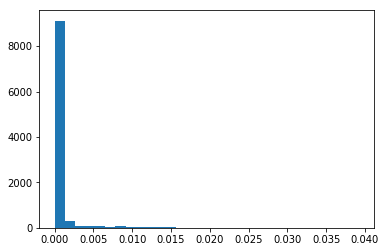

In [334]:
plt.hist(shuffled_mean[8,:], bins=30);

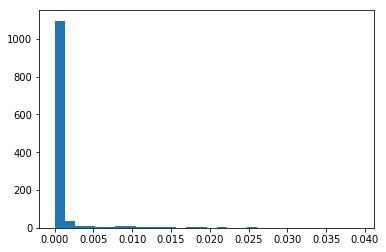

In [331]:
plt.hist(mean_sweep_events['8'], bins=30);

In [363]:
session_id

681698752